# 📘 Advanced Level Project: Exploring DistilBERT Language Model

## ShadowFox AI/ML Internship — Advanced Task

In this project, we explore a pretrained Language Model (DistilBERT) to understand
how modern NLP models capture semantic meaning from text.

The goal is to analyze the model’s behavior, strengths, and limitations through
experiments and observations.


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

model.eval()  # set model to evaluation mode


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

## 🧠 Understanding DistilBERT

DistilBERT is a lightweight version of BERT that:
- Understands context in text
- Converts sentences into numerical representations (embeddings)
- Captures semantic similarity between sentences

These embeddings can be compared to analyze meaning.


In [4]:
def get_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)

    with torch.no_grad():
        outputs = model(**inputs)

    # Mean pooling of token embeddings
    embedding = outputs.last_hidden_state.mean(dim=1)
    return embedding.numpy()


In [5]:
sentences = [
    "I am enjoying my AI ML internship",
    "This internship experience is very helpful",
    "I am unhappy with this experience",
    "Machine learning is very interesting",
    "I love working on real world projects"
]

embeddings = np.vstack([get_embedding(s) for s in sentences])


In [6]:
similarity_matrix = cosine_similarity(embeddings)

similarity_matrix


array([[0.9999999 , 0.75127447, 0.81487244, 0.688253  , 0.7802744 ],
       [0.75127447, 0.9999999 , 0.68328345, 0.81852114, 0.7439252 ],
       [0.81487244, 0.68328345, 0.9999999 , 0.67147636, 0.723007  ],
       [0.688253  , 0.81852114, 0.67147636, 1.        , 0.7564216 ],
       [0.7802744 , 0.7439252 , 0.723007  , 0.7564216 , 1.0000001 ]],
      dtype=float32)

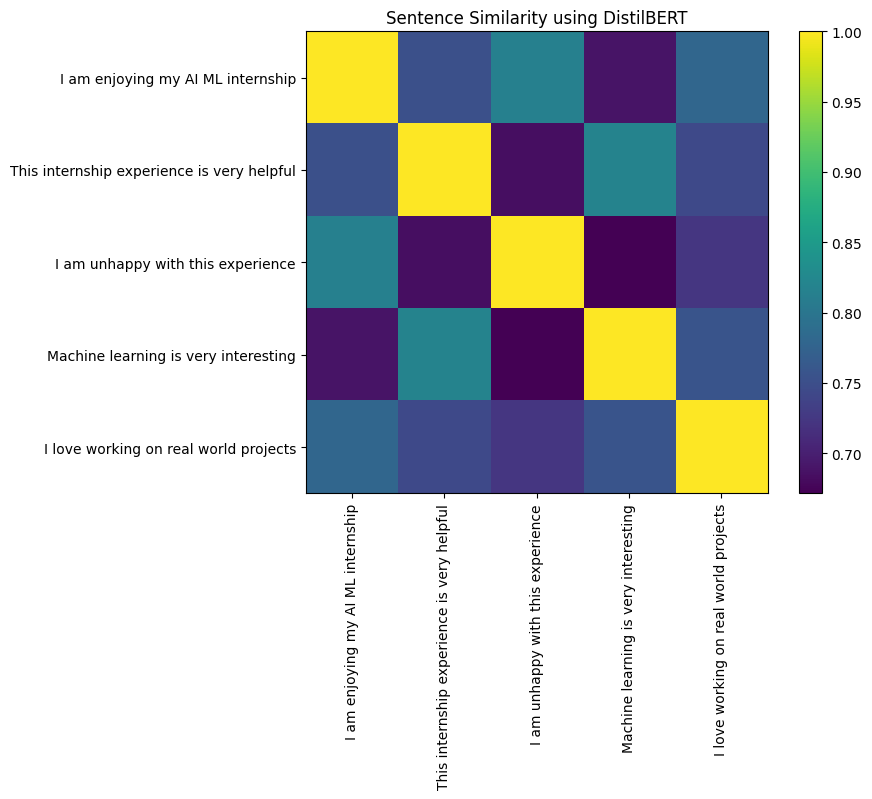

In [7]:
plt.figure(figsize=(8,6))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar()
plt.xticks(range(len(sentences)), sentences, rotation=90)
plt.yticks(range(len(sentences)), sentences)
plt.title("Sentence Similarity using DistilBERT")
plt.show()


## ✅ Strengths
- Lightweight and fast
- Captures semantic meaning well
- Easy to use with pretrained weights

## ⚠️ Limitations
- Does not generate text
- Can reflect biases present in training data
- Requires careful interpretation


## 🏁 Conclusion

This project demonstrated how a pretrained language model like DistilBERT
can be used to understand and analyze text.

Through experiments and visualization, we observed that the model
effectively captures semantic similarity and contextual meaning.

This exploration highlights the importance of pretrained language models
in modern NLP applications.
